REDUCE NOISE AND SHARPEN IMAGE

I) BLUR: used to reduce noise and reduce detail in images. Usually performed before edge detecting

<IPython.core.display.Javascript object>


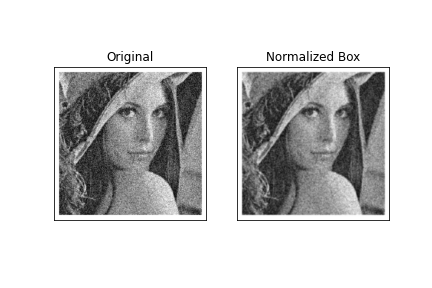

In [2]:
%matplotlib notebook
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from ShowImg import showImg,show1img

#Load image
img = cv.imread('GaussianNoise.png')

# Normal blur (a.k.a Normalize Box, Average blur): replace center element by the average value of all pixels in kernel
blur = cv.blur(img,(5,5))
titles=['Original','Normalized Box']
images=[img,blur]
showImg(2,images,titles)
# images=[img,blur]
# show1img('Original',img,'gray',3)
# show1img('Normalized Box',blur,'gray',3)

<IPython.core.display.Javascript object>


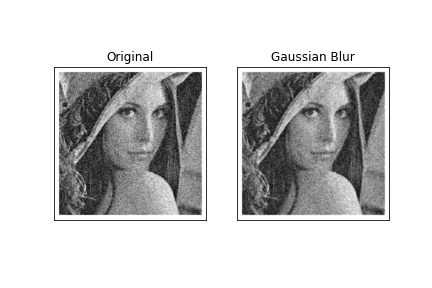

In [3]:
blur2 = cv.GaussianBlur(img,(5,5),0)
titles=['Original','Gaussian Blur']
images=[img,blur2]
showImg(2,images,titles)

Gaussian blur: effective for Gaussian noise

<IPython.core.display.Javascript object>


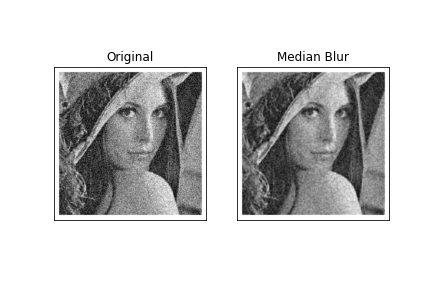

In [4]:
median = cv.medianBlur(img,5)
titles=['Original','Median Blur']
images=[img,median]
showImg(2,images,titles)

Median blur: takes the median of all the pixels in the kernel area, and replace center element with that value

Effective for salt-and-pepper noise

<IPython.core.display.Javascript object>


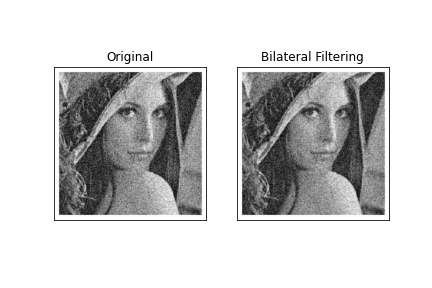

In [5]:
blur3 = cv.bilateralFilter(img,5,75,75)
titles=['Original','Bilateral Filtering']
images=[img,blur3]
showImg(2,images,titles)

Bilateral Filtering

This func use 2 Gaussian filters.

One func makes sure that only nearby pixels are considered for blurring and the other one (Gaussian function of intensity difference) make sure only those pixels with similar intensities to the central pixel are considered for blurring

<IPython.core.display.Javascript object>


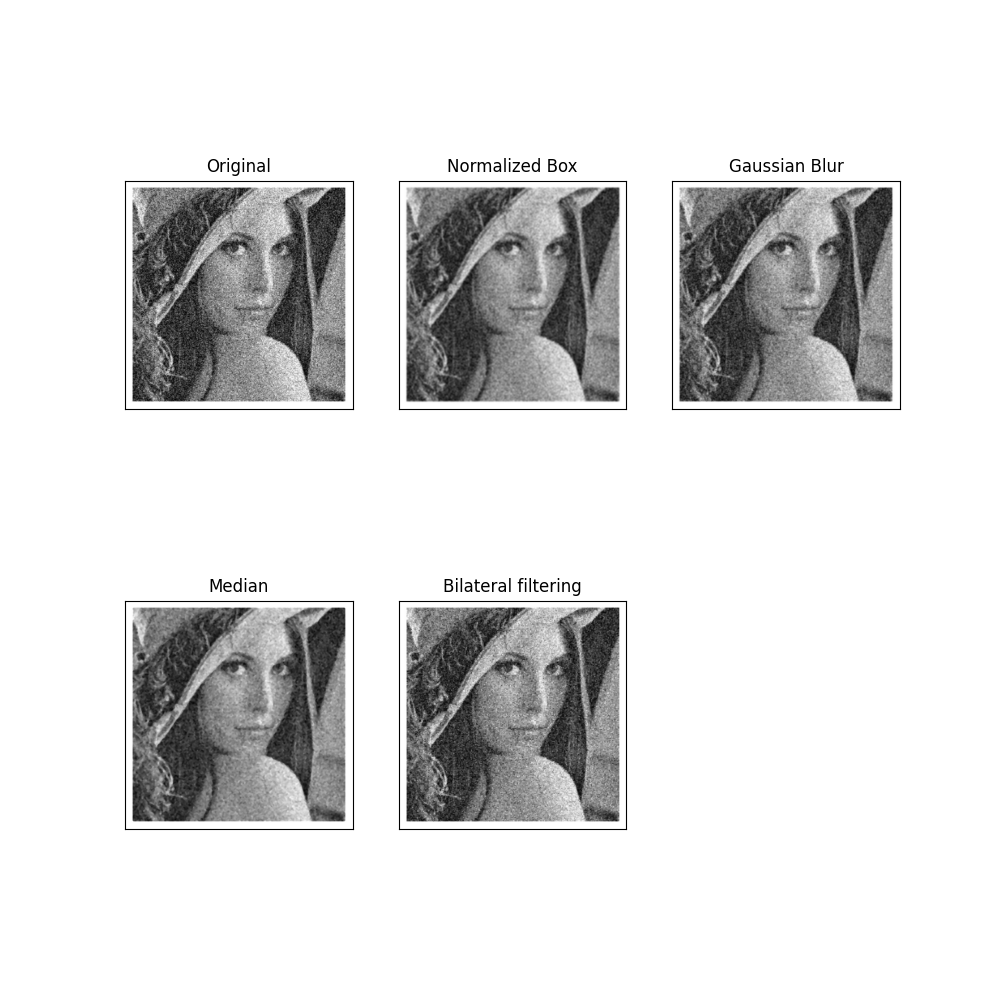

In [23]:
#Show result
titles = ['Original','Normalized Box','Gaussian Blur','Median','Bilateral filtering']
images = [img, blur, blur2, median,blur3]

plt.figure(figsize=(10,10))
#Show all images (Original, GauBlur, Blur, MedBlur, Bilateral filtering)
showImg(5,images,titles)

II) SHARPEN

<IPython.core.display.Javascript object>


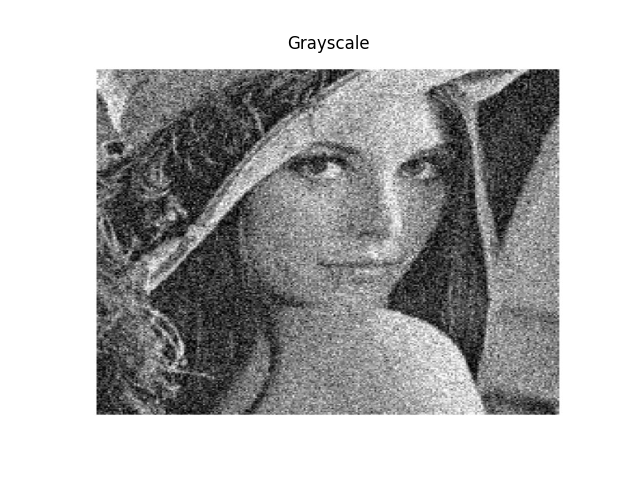

In [24]:
%matplotlib notebook
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import ShowImg

#Load image
img = cv.imread("GaussianNoise.png")

#Convert to grayscale
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

#Image
ShowImg.show1img('Grayscale',gray,'gray',3)

<IPython.core.display.Javascript object>


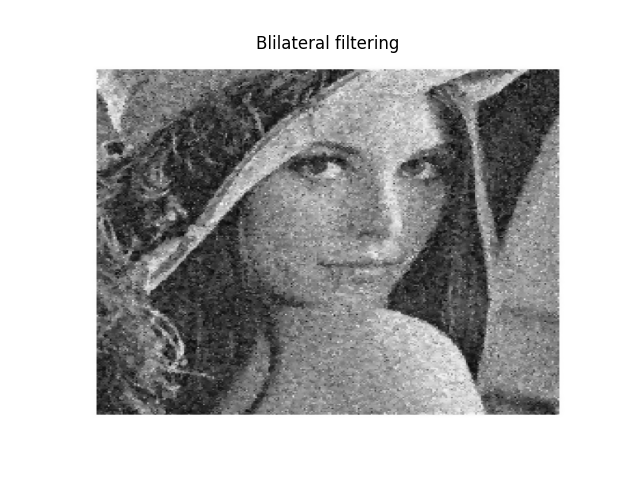

In [25]:
#Bilateral Filtering
blur2 =cv.bilateralFilter(img,9,75,75)
ShowImg.show1img('Blilateral filtering',blur2,'gray',3)

<IPython.core.display.Javascript object>


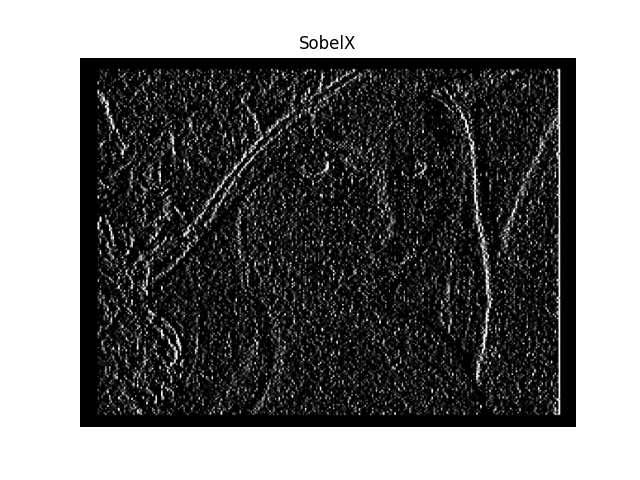

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [26]:
#Apply Sharpen
#We have: Sobel or Laplacian
#Dimension depth
ddepth = cv.CV_16S;
kernel_size=3
scale = 1
delta = 0

#Create unsharp mask
laplacian = cv.Laplacian(blur2,cv.CV_64F)
sobelx = cv.Sobel(blur2,ddepth,1,0,kernel_size)
sobely = cv.Sobel(blur2,ddepth,0,1,kernel_size)

#Show unsharp mask
#SobelX
ShowImg.show1img('SobelX',sobelx,'gray',3)

<IPython.core.display.Javascript object>


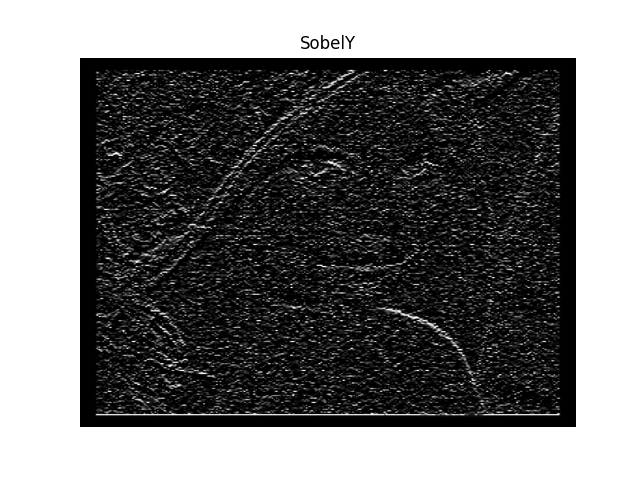

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [27]:
#SobelY
ShowImg.show1img('SobelY',sobely,'gray',3)

<IPython.core.display.Javascript object>


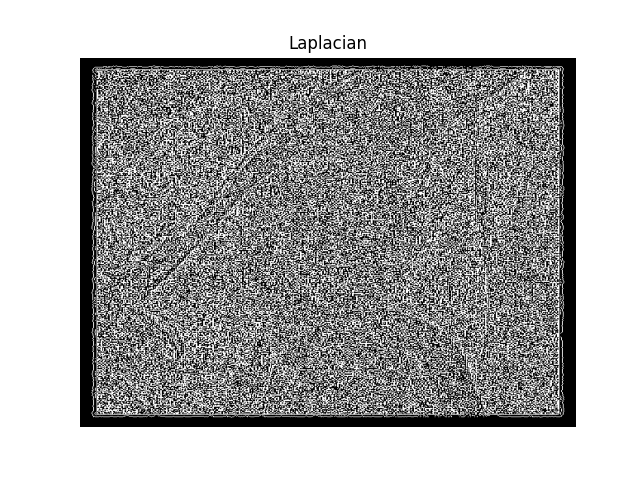

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [28]:
#Lap
ShowImg.show1img('Laplacian',laplacian,'gray',3)

<IPython.core.display.Javascript object>


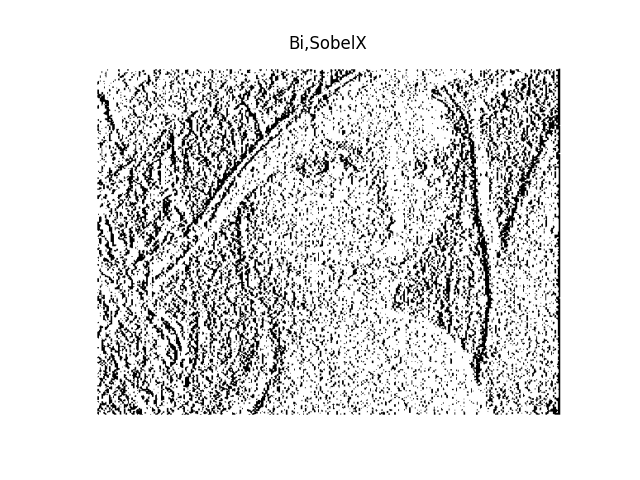

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [29]:
#Sharpen image
#Blur with Bilateral Filtering, then sharpen with SobelX unsharp mask
sharp1 = blur2 -2.5*sobelx
ShowImg.show1img('Bi,SobelX',sharp1,'gray',3)

<IPython.core.display.Javascript object>


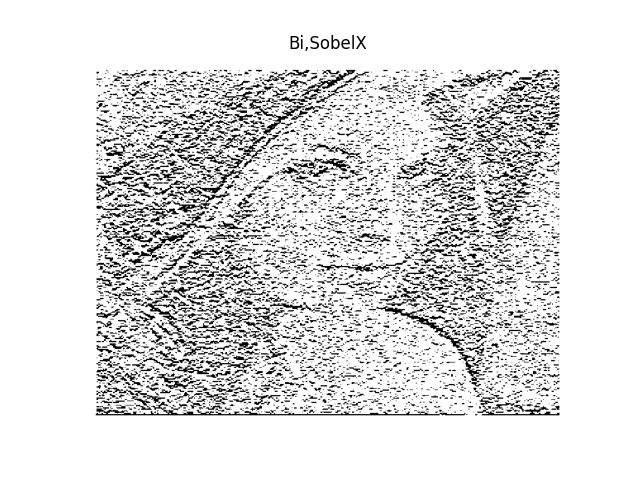

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [30]:
#Sharpen image
#Blur with Bilateral Filtering, then sharpen with SobelY unsharp mask
sharp2 = blur2 -2.5*sobely
ShowImg.show1img('Bi,SobelX',sharp2,'gray',3)

<IPython.core.display.Javascript object>


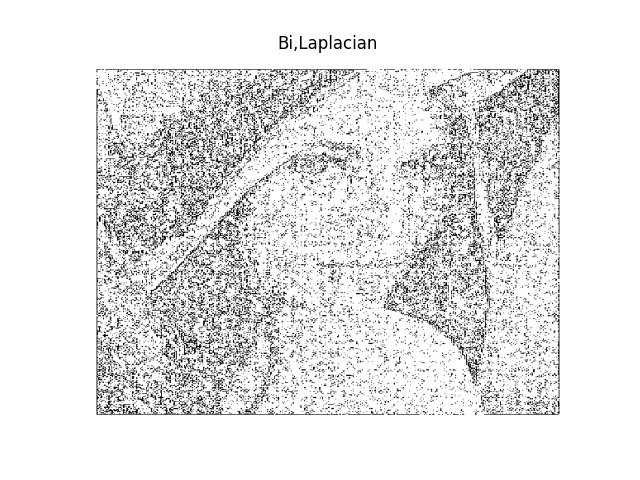

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [33]:
#Sharpen image
#Blur with Bilateral Filtering, then sharpen with Laplacian unsharp mask
sharp3 = blur2 - 4.3*laplacian
ShowImg.show1img('Bi,Laplacian',sharp3,'gray',3)

In [6]:
import numpy as np
from builtins import input
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import ShowImg

#Build a lookup table to map pixel
def adjust_gamma(image, gamma=1.0):
    # build a lookup table mapping the pixel values [0, 255] to
    # their adjusted gamma values
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
                      for i in np.arange(0, 256)]).astype("uint8")
    # apply gamma correction using the lookup table
    return cv.LUT(image, table)

#Load image
original = cv.imread('bright.jpeg')
#Convert to its original corlor
b, g, r = cv.split(original)
rgb = cv.merge([r, g, b])


 Basic Gamma Correction 
-------------------------
* Enter the gamma value [0.0-3.0]: 2


<IPython.core.display.Javascript object>


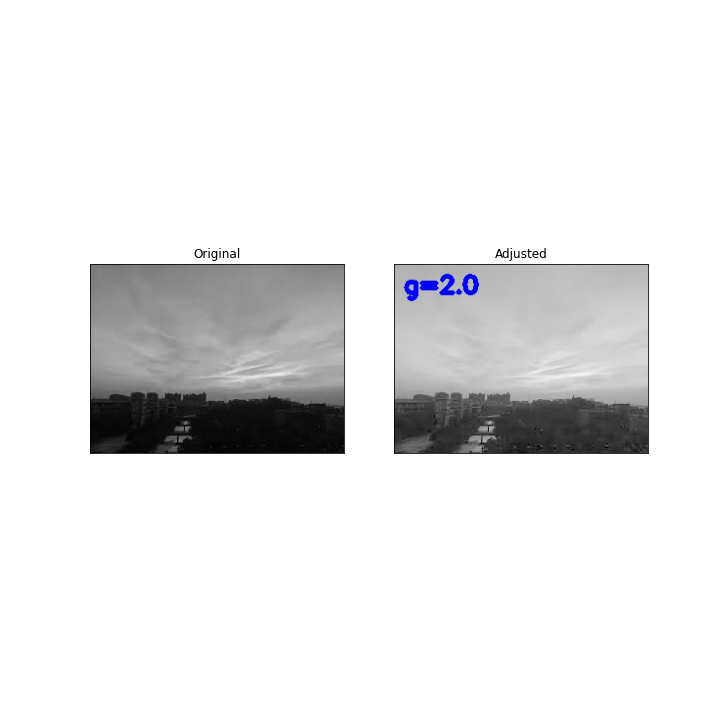

In [7]:
#Receive user input
print(' Basic Gamma Correction ')
print('-------------------------')
try:
    gamma = float(input('* Enter the gamma value [0.0-3.0]: '))
except ValueError:
    print('Error, not a number')

#Adjust gamma
adjusted = adjust_gamma(rgb, gamma=gamma)
cv2.putText(adjusted, "g={}".format(gamma), (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 3)
titles = ["Original", "Adjusted"]
images = [rgb, adjusted]
plt.figure(figsize=(10,10))
ShowImg.showImg(2,images,titles)

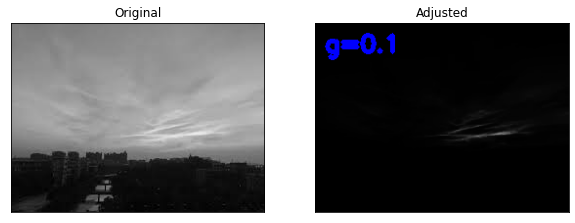

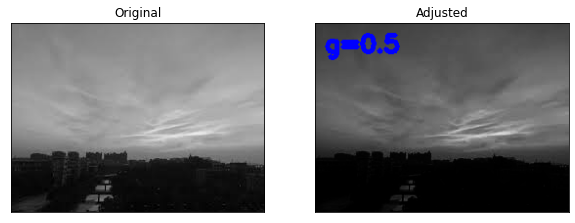

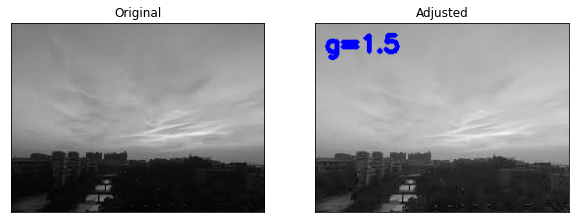

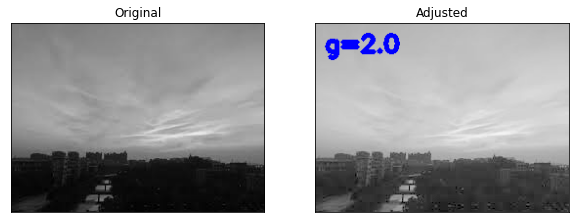

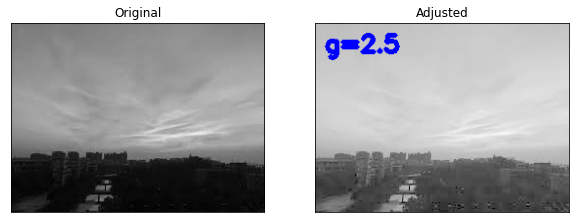

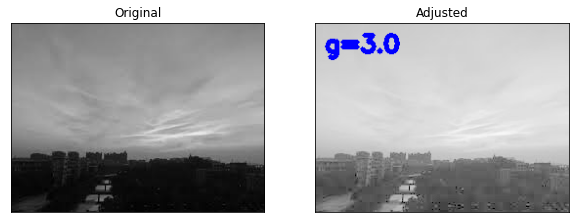

In [11]:
## loop over various values of gamma (adjustable)
# to print various gamma values
%matplotlib inline
for gamma in np.arange(0.0, 3.5, 0.5):
    # ignore when gamma is 1 (there will be no change to the image)
    if gamma == 1:
        continue
    # apply gamma correction and show the images
    gamma = gamma if gamma > 0 else 0.1
    adjusted = adjust_gamma(rgb, gamma=gamma)
    cv2.putText(adjusted, "g={}".format(gamma), (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 3)
    titles = ["Original", "Adjusted"]
    plt.figure(figsize=(10,10))
    images = [rgb, adjusted]
    ShowImg.showImg(2,images,titles)

IV) BRIGHTNESS AND CONTRAST

In [9]:
# Read image given by user
image = cv.imread('bright.jpeg')

#Modify image
#CV reads image in B, G, R
#I am using Matplotlib to plot image
#Matplotlib follows R, G, B order ==> So I have to convert input image
b,g,r = cv.split(image)
img2 = cv.merge([r,g,b])

#Create new image. It will contain our adjusted image
new_image = np.zeros(image.shape, image.dtype)

#y = alpha * x + beta 
#Alpha controls contrast
#Beta controls brightness
alpha = 1.0 # Simple contrast control
beta = 0    # Simple brightness control

#Receive User input
# Initialize values
print(' Basic Linear Transforms ')
print('-------------------------')
try:
    alpha = float(input('* Enter the alpha value [1.0-3.0]: '))
    beta = int(input('* Enter the beta value [0-100]: '))
except ValueError:
    print('Error, not a number')

 Basic Linear Transforms 
-------------------------
* Enter the alpha value [1.0-3.0]: 2
* Enter the beta value [0-100]: 2


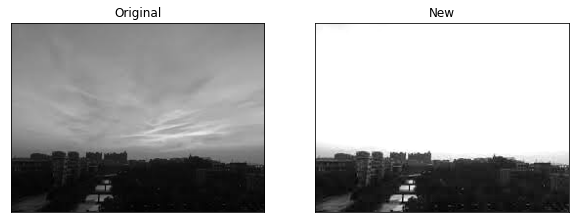

In [10]:
# Do the operation new_image(i,j) = alpha*image(i,j) + beta
# Instead of these 'for' loops we could have used simply:
# new_image = cv.convertScaleAbs(image, alpha=alpha, beta=beta)
# but I try to access the pixels 
for y in range(img2.shape[0]):
    for x in range(img2.shape[1]):
        for c in range(img2.shape[2]):
            new_image[y,x,c] = np.clip(alpha*img2[y,x,c] + beta, 0, 255)
# cv.imshow('Original Image', image)
# cv.imshow('New Image', new_image)
titles=["Original","New"]
images=[img2,new_image]
plt.figure(figsize=(10,10))
showImg(2,images,titles)